# Alphalens Example Tear Sheet

Alphalens is designed to aid in the analysis of "alpha factors," data transformations that are used to predict future price movements of financial instruments. Alpha factors take the form of a single value for each asset on each day. The dimension of these values is not necessarily important. We evaluate an alpha factor by considering daily factor values relative to one another. 

It is important to note the difference between an alpha factor and a trading algorithm. A trading algorithm uses an alpha factor, or combination of alpha factors to generate trades.  Trading algorithms cover execution and risk constraints: the business of turning predictions into profits. Alpha factors, on the other hand, are focused soley on making predictions. This difference in scope lends itself to a difference in the methodologies used to evaluate alpha factors and trading algorithms. Alphalens does not contain analyses of things like transaction costs, capacity, or portfolio construction. Those interested in more implementation specific analyses are encouaged to check out pyfolio (https://github.com/quantopian/pyfolio), a library specifically geared towards the evaluation of trading algorithms. 





In [1]:
%pylab inline --no-import-all
import alphalens
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ticker_sector = {
    "ACN" : 0, "ATVI" : 0, "ADBE" : 0, "AMD" : 0, "AKAM" : 0, "ADS" : 0, "GOOGL" : 0, "GOOG" : 0, 
    "APH" : 0, "ADI" : 0, "ANSS" : 0, "AAPL" : 0, "AMAT" : 0, "ADSK" : 0, "ADP" : 0, "AVGO" : 0,
    "AMG" : 1, "AFL" : 1, "ALL" : 1, "AXP" : 1, "AIG" : 1, "AMP" : 1, "AON" : 1, "AJG" : 1, "AIZ" : 1, "BAC" : 1,
    "BK" : 1, "BBT" : 1, "BRK.B" : 1, "BLK" : 1, "HRB" : 1, "BHF" : 1, "COF" : 1, "CBOE" : 1, "SCHW" : 1, "CB" : 1,
    "ABT" : 2, "ABBV" : 2, "AET" : 2, "A" : 2, "ALXN" : 2, "ALGN" : 2, "AGN" : 2, "ABC" : 2, "AMGN" : 2, "ANTM" : 2,
    "BCR" : 2, "BAX" : 2, "BDX" : 2, "BIIB" : 2, "BSX" : 2, "BMY" : 2, "CAH" : 2, "CELG" : 2, "CNC" : 2, "CERN" : 2,
    "MMM" : 3, "AYI" : 3, "ALK" : 3, "ALLE" : 3, "AAL" : 3, "AME" : 3, "AOS" : 3, "ARNC" : 3, "BA" : 3, "CHRW" : 3,
    "CAT" : 3, "CTAS" : 3, "CSX" : 3, "CMI" : 3, "DE" : 3, "DAL" : 3, "DOV" : 3, "ETN" : 3, "EMR" : 3, "EFX" : 3,
    "AES" : 4, "LNT" : 4, "AEE" : 4, "AEP" : 4, "AWK" : 4, "CNP" : 4, "CMS" : 4, "ED" : 4, "D" : 4, "DTE" : 4,
    "DUK" : 4, "EIX" : 4, "ETR" : 4, "ES" : 4, "EXC" : 4, "FE" : 4, "NEE" : 4, "NI" : 4, "NRG" : 4, "PCG" : 4,
    "ARE" : 5, "AMT" : 5, "AIV" : 5, "AVB" : 5, "BXP" : 5, "CBG" : 5, "CCI" : 5, "DLR" : 5, "DRE" : 5,
    "EQIX" : 5, "EQR" : 5, "ESS" : 5, "EXR" : 5, "FRT" : 5, "GGP" : 5, "HCP" : 5, "HST" : 5, "IRM" : 5, "KIM" : 5,
    "APD" : 6, "ALB" : 6, "AVY" : 6, "BLL" : 6, "CF" : 6, "DWDP" : 6, "EMN" : 6, "ECL" : 6, "FMC" : 6, "FCX" : 6,
    "IP" : 6, "IFF" : 6, "LYB" : 6, "MLM" : 6, "MON" : 6, "MOS" : 6, "NEM" : 6, "NUE" : 6, "PKG" : 6, "PPG" : 6,
    "T" : 7, "CTL" : 7, "VZ" : 7, 
    "MO" : 8, "ADM" : 8, "BF.B" : 8, "CPB" : 8, "CHD" : 8, "CLX" : 8, "KO" : 8, "CL" : 8, "CAG" : 8,
    "STZ" : 8, "COST" : 8, "COTY" : 8, "CVS" : 8, "DPS" : 8, "EL" : 8, "GIS" : 8, "HSY" : 8, "HRL" : 8,
    "AAP" : 9, "AMZN" : 9, "APTV" : 9, "AZO" : 9, "BBY" : 9, "BWA" : 9, "KMX" : 9, "CCL" : 9, 
    "APC" : 10, "ANDV" : 10, "APA" : 10, "BHGE" : 10, "COG" : 10, "CHK" : 10, "CVX" : 10, "XEC" : 10, "CXO" : 10,
    "COP" : 10, "DVN" : 10, "EOG" : 10, "EQT" : 10, "XOM" : 10, "HAL" : 10, "HP" : 10, "HES" : 10, "KMI" : 10
}

In [4]:
import pandas_datareader.data as web
pan = web.DataReader(list(ticker_sector.keys()), "yahoo", '2014-12-01', '2017-07-01')

In [5]:
pan = pan.transpose(2,1,0)

For demonstration purposes we will create a predictive factor. To cheat we will look at future prices to make sure we'll rank high stoks that will perform well and vice versa.

In [6]:
lookahead_bias_days = 5

predictive_factor = pan.loc[:,:,'Open']
predictive_factor = predictive_factor.pct_change(lookahead_bias_days)
# introduce look-ahead bias and make the factor predictive
predictive_factor = predictive_factor.shift(-lookahead_bias_days)

predictive_factor = predictive_factor.stack()
predictive_factor.index = predictive_factor.index.set_names(['date', 'asset'])

In [7]:
predictive_factor.head()

date        asset
2014-12-01  A       -0.010775
            AAL      0.029388
            AAP      0.057920
            AAPL    -0.039643
            ABBV     0.010567
dtype: float64

The pricing data passed to alphalens should contain the entry price for the assets so it must reflect the next available price after a factor value was observed at a given timestamp. Those prices must not be used in the calculation of the factor values for that time. Always double check to ensure you are not introducing lookahead bias to your study.

The pricing data must also contain the exit price for the assets, for period 1 the price at the next timestamp will be used, for period 2 the price after 2 timestats will be used and so on.

There are no restrinctions/assumptions on the time frequencies a factor should be computed at and neither on the specific time a factor should be traded (trading at the open vs trading at the close vs intraday trading), it is only required that factor and price DataFrames are properly aligned given the rules above.

In our example, before the trading starts every day, we observe yesterday factor values. The price we pass to alphalens is the next available price after that factor observation: the daily open price that will be used as assets entry price. Also, we are not adding additional prices so the assets exit price will be the following days open prices (how many days depends on 'periods' argument). The retuns computed by Alphalens will therefore based on  assets open prices.

In [8]:
pricing = pan.loc[:,:,'Open'].iloc[1:]
pricing.head()

A        AAL         AAP        AAPL       ABBV  \
Date                                                                  
2014-12-02  41.599998  48.119999  146.710007  113.500000  68.879997   
2014-12-03  41.980000  47.740002  148.440002  115.750000  69.169998   
2014-12-04  42.150002  49.599998  152.419998  115.769997  68.349998   
2014-12-05  42.230000  50.090000  154.210007  115.989998  69.519997   
2014-12-08  42.230000  50.439999  154.889999  114.099998  69.809998   

                  ABC        ABT        ACN       ADBE        ADI    ...      \
Date                                                                 ...       
2014-12-02  90.930000  44.680000  85.849998  74.000000  54.540001    ...       
2014-12-03  91.989998  45.220001  86.400002  73.639999  54.950001    ...       
2014-12-04  91.870003  45.660000  86.410004  73.089996  56.459999    ...       
2014-12-05  92.379997  45.430000  86.309998  73.160004  56.750000    ...       
2014-12-08  92.010002  45.349998  86.160004  72.400002  56.950001    ...       

                  NUE        PCG        PKG         PPG       SCHW        STZ  \
Date                                                                            
2014-12-02  53.410000  50.689999  73.209999  110.605003  27.860001  94.930000   
2014-12-03  53.389999  51.500000  74.779999  109.800003  28.200001  94.260002   
2014-12-04  55.000000  50.910000  76.760002  111.555000  28.940001  94.010002   
2014-12-05  55.020000  49.860001  77.790001  111.949997  29.770000  94.250000   
2014-12-08  54.240002  50.970001  78.010002  111.199997  29.940001  94.949997   

                    T         VZ         XEC        XOM  
Date                                                     
2014-12-02  34.889999  49.799999  102.790001  92.320000  
2014-12-03  34.250000  49.020000  103.809998  94.669998  
2014-12-04  34.080002  48.730000  105.550003  94.129997  
2014-12-05  33.880001  48.680000  106.860001  93.949997  
2014-12-08  33.980000  48.770000  103.010002  92.900002  

[5 rows x 182 columns]

Often, we'd want to know how our factor looks across various groupings (sectors, industires, countries, etc.), in this example let's use sectors. To generate sector level breakdowns, you'll need to pass alphalens a sector mapping for each traded name. 

This mapping can come in the form of a MultiIndexed Series (with the same date/symbol index as your factor value) if you want to provide a sector mapping for each symbol on each day. 

If you'd like to use constant sector mappings, you may pass symbol to sector mappings as a dict.

If your sector mappings come in the form of codes (as they do in this tutorial), you may also pass alphalens a dict of sector names to use in place of sector codes.

In [9]:
sector_names = {
    0 : "information_technology",
    1 : "financials",
    2 : "health_care",
    3 : "industrials",
    4 : "utilities", 
    5 : "real_estate", 
    6 : "materials", 
    7 : "telecommunication_services", 
    8 : "consumer_staples", 
    9 : "consumer_discretionary", 
    10 : "energy" 
}

## Formatting input data

Alphalens contains a handy data formatting function to transform your factor and pricing data into the exact inputs expected by the tear sheet functions.

In [10]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor, 
                                                                   pricing, 
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   groupby=ticker_sector,
                                                                   groupby_labels=sector_names)

Dropped 1.0% entries from factor data: 1.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0% -> not exceeded: OK!


The function inform the user how much data was dropped after formatting the input data. Factor data can be partially dropped due to being flawed itself (e.g. NaNs), not having provided enough price data to compute forward returns for all factor values, or because it is not possible to perform binning. It is possible to control the maximum allowed data loss using 'max_loss' argument.

In [11]:
factor_data.head()

1D        5D       10D    factor  \
date       asset                                           
2014-12-02 A      0.009135 -0.014663 -0.079327 -0.014663   
           AAL   -0.007897  0.020366  0.060058  0.020366   
           AAP    0.011792  0.036126  0.097403  0.036126   
           AAPL   0.019824 -0.029163 -0.062819 -0.029163   
           ABBV   0.004210 -0.009727 -0.054733 -0.009727   

                                   group  factor_quantile  
date       asset                                           
2014-12-02 A                 health_care                2  
           AAL               industrials                5  
           AAP    consumer_discretionary                5  
           AAPL   information_technology                1  
           ABBV              health_care                2

You'll notice that we've placed all of the information we need for our calculations into one dataframe. Variables are the columns, and observations are each row.

The integer columns represents the forward returns or the daily price change for the N days after a timestamp. The 1 day forward return for AAPL on 2014-12-2 is the percent change in the AAPL open price on 2014-12-2 and the AAPL open price on 2014-12-3. The 5 day forward return is the percent change from open 2014-12-2 to open 2014-12-9 (5 trading days) divided by 5.

# Returns Analysis

Returns analysis gives us a raw description of a factor's value that shows us the power of a factor in real currency values.

One of the most basic ways to look at a factor's predicitve power is to look at the mean return of different factor quantile. 

In [12]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)

In [13]:
mean_return_by_q_daily.head()

1D        5D       10D
factor_quantile date                                    
1               2014-12-02 -0.000114 -0.046977 -0.062848
                2014-12-03 -0.011898 -0.052947 -0.058710
                2014-12-04 -0.002693 -0.050253 -0.032514
                2014-12-05 -0.014685 -0.065452 -0.032241
                2014-12-08 -0.020663 -0.053688 -0.023597

In [14]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_date=False)

In [15]:
mean_return_by_q.head()

1D        5D       10D
factor_quantile                              
1               -0.008670 -0.041750 -0.041505
2               -0.002670 -0.013200 -0.013499
3               -0.000039 -0.000302 -0.000148
4                0.002632  0.012428  0.012623
5                0.008746  0.042805  0.042507

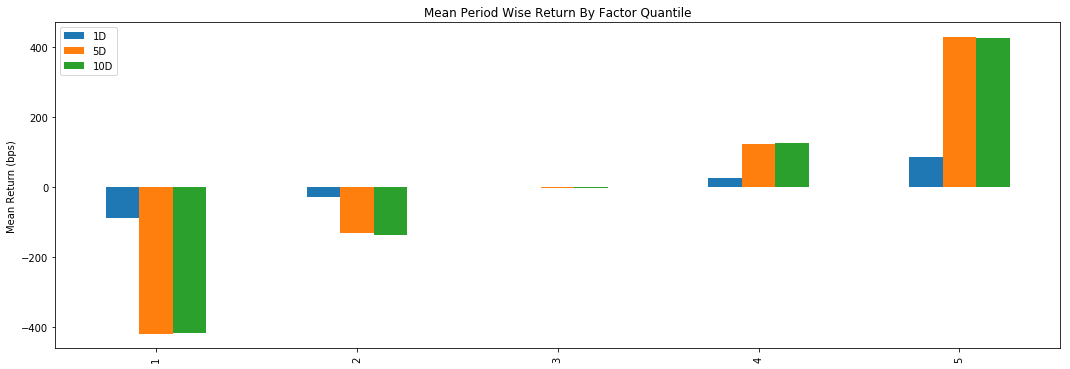

In [16]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q);

By looking at the mean return by quantile we can get a real look at how well the factor differentiates forward returns across the signal values. Obviously we want securities with a better signal to exhibit higher returns. For a good factor we'd expect to see negative values in the lower quartiles and positive values in the upper quantiles.

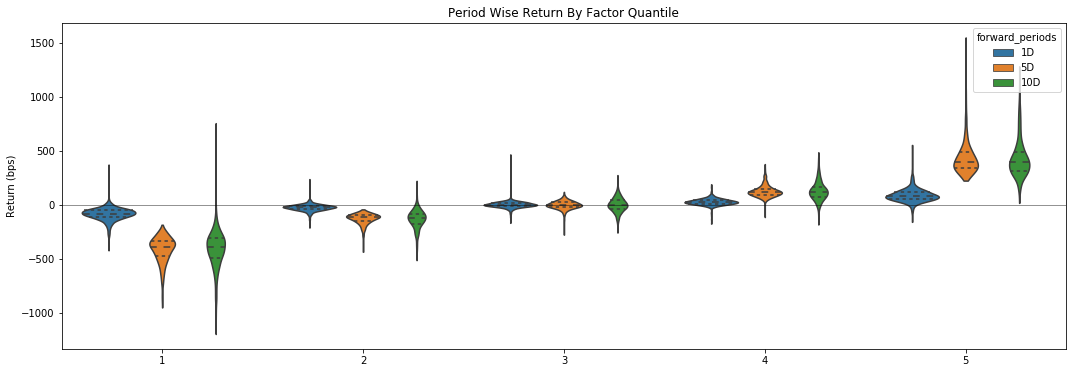

In [17]:
alphalens.plotting.plot_quantile_returns_violin(mean_return_by_q_daily);

This violin plot is similar to the one before it but shows more information about the underlying data. It gives a better idea about the range of values, the median, and the inter-quartile range. What gives the plots their shape is the application of a probability density of the data at different values.

In [18]:
quant_return_spread, std_err_spread = alphalens.performance.compute_mean_returns_spread(mean_return_by_q_daily,
                                                                                        upper_quant=5,
                                                                                        lower_quant=1,
                                                                                        std_err=std_err)

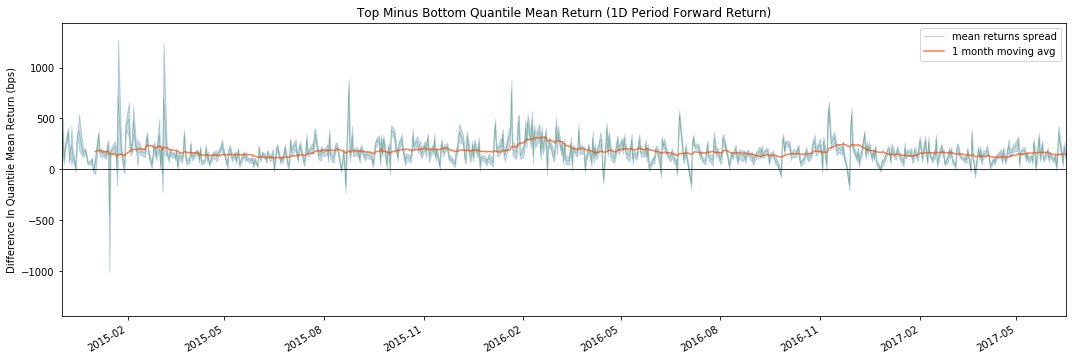

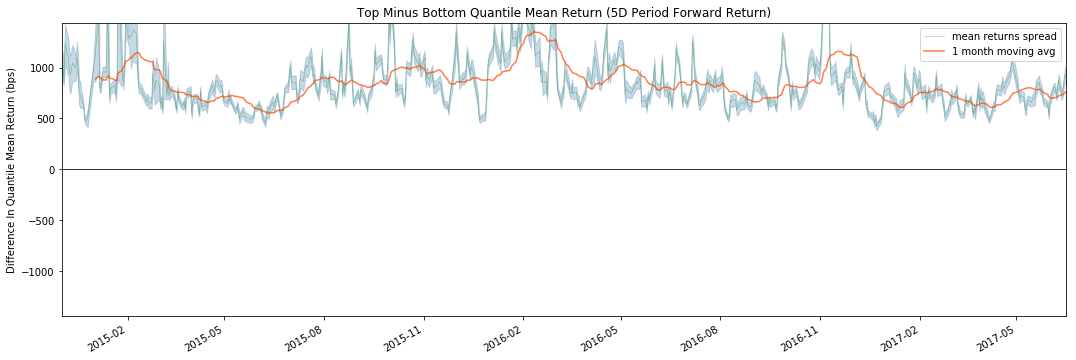

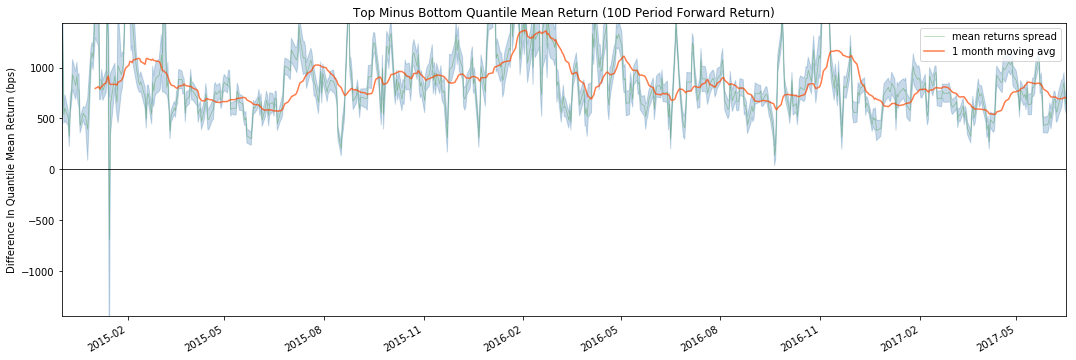

In [19]:
alphalens.plotting.plot_mean_quantile_returns_spread_time_series(quant_return_spread, std_err_spread);

This rolling forward returns spread graph allows us to look at the raw spread in basis points between the top and bottom quantiles over time. The green line is the returns spread while the orange line is a 1 month average to smooth the data and make it easier to visualize.

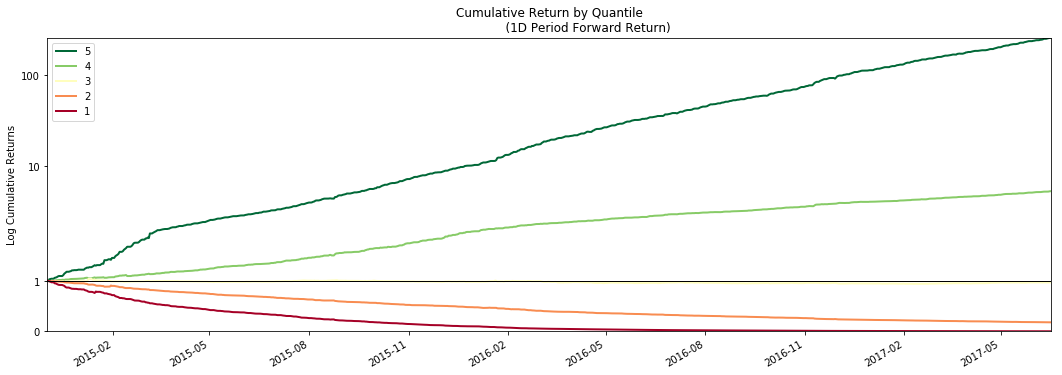

In [20]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily, period='1D')

By looking at the cumulative returns by factor quantile we can get an intuition for which quantiles are contributing the most to the factor and at what time. Ideally we would like to see a these curves originate at the same value on the left and spread out like a fan as they move to the right through time, with the higher quantiles on the top.

In [21]:
ls_factor_returns = alphalens.performance.factor_returns(factor_data)

In [22]:
ls_factor_returns.head()

1D        5D       10D
date                                    
2014-12-02  0.001799  0.095915  0.222199
2014-12-03  0.064053  0.094642  0.204601
2014-12-04  0.004372  0.041436  0.030163
2014-12-05  0.009315  0.125023 -0.010749
2014-12-08  0.016122  0.130299  0.020553

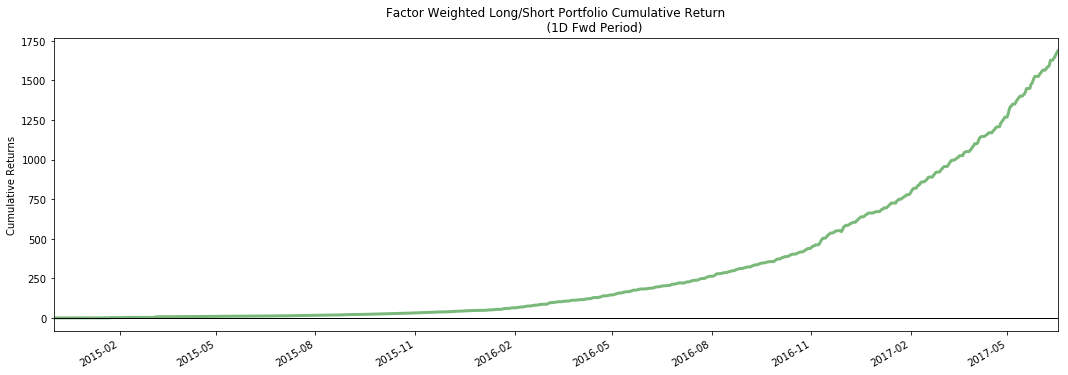

In [23]:
alphalens.plotting.plot_cumulative_returns(ls_factor_returns['1D'], period='1D')

While looking at quantiles is important we must also look at the factor returns as a whole. The cumulative factor long/short returns plot lets us view the combined effects overtime of our entire factor.

In [24]:
alpha_beta = alphalens.performance.factor_alpha_beta(factor_data)

In [25]:
alpha_beta

1D         5D       10D
Ann. alpha  20.690037  14.905273  2.719508
beta         0.222631   0.296979  0.375576

A very important part of factor returns analysis is determing the alpha, and how significant it is. Here we surface the annualized alpha, and beta.

## Returns Tear Sheet

We can view all returns analysis calculations together.

Returns Analysis


1D       5D     10D
Ann. alpha                                      20.690   14.905   2.720
beta                                             0.223    0.297   0.376
Mean Period Wise Return Top Quantile (bps)      87.462   84.181  41.715
Mean Period Wise Return Bottom Quantile (bps)  -86.701  -84.931 -42.301
Mean Period Wise Spread (bps)                  174.163  169.095  84.030

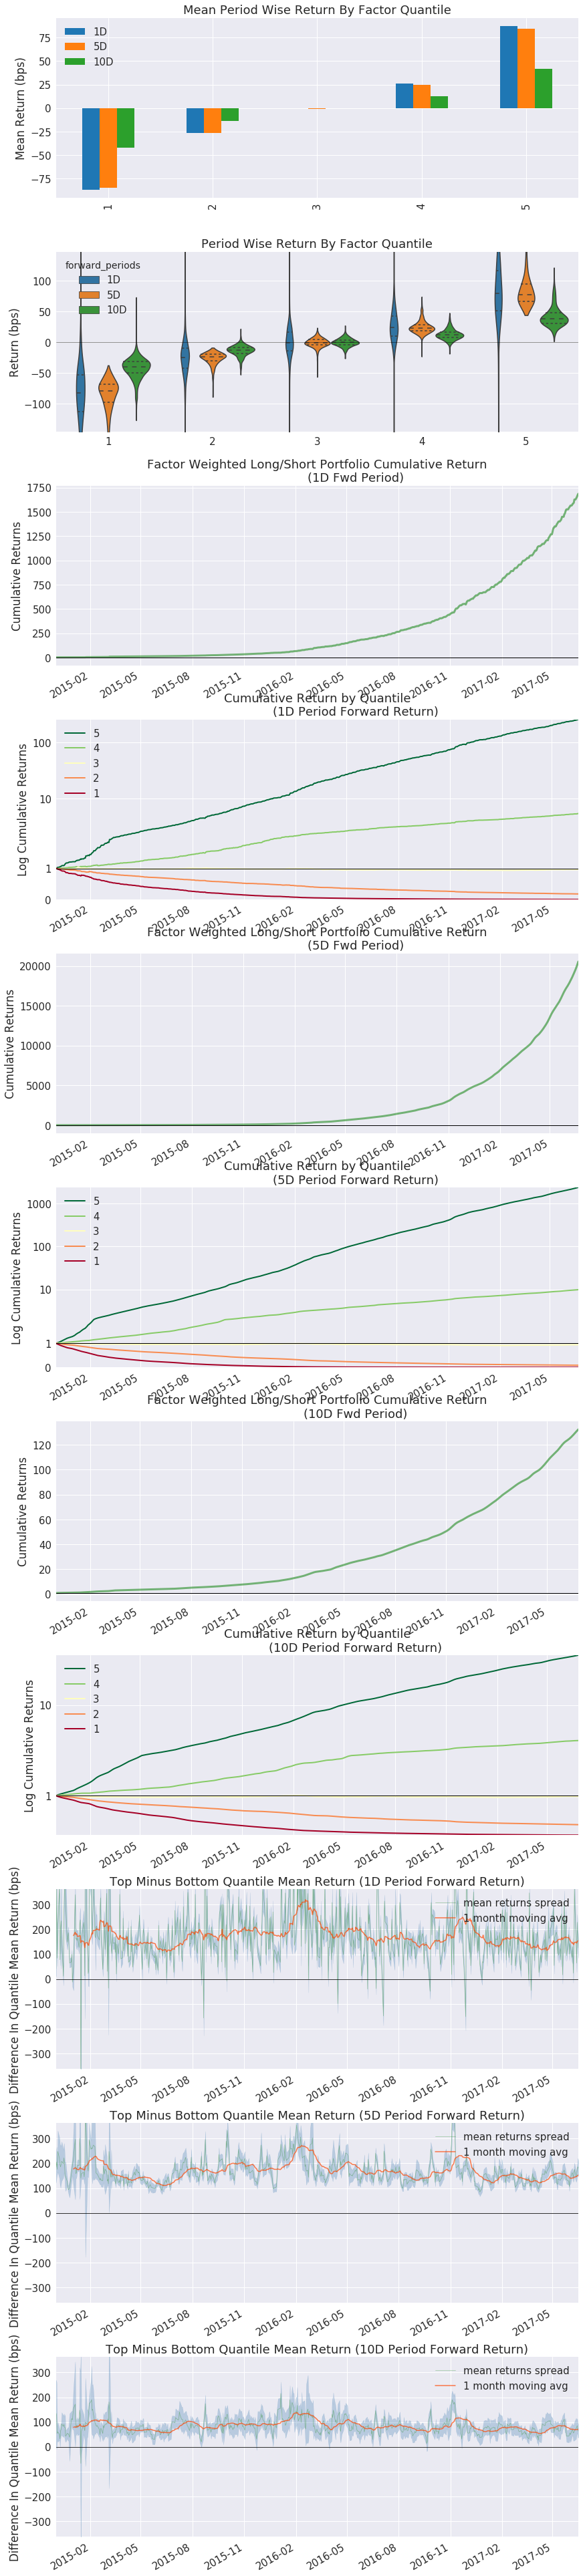

In [26]:
alphalens.tears.create_returns_tear_sheet(factor_data)

# Information Analysis

Information Analysis is a way for us to evaluate the predicitive value of a factor without the confounding effects of transaction costs. The main way we look at this is through the Information Coefficient (IC).

From Wikipedia...

>The information coefficient (IC) is a measure of the merit of a predicted value. In finance, the information coefficient is used as a performance metric for the predictive skill of a financial analyst. The information coefficient is similar to correlation in that it can be seen to measure the linear relationship between two random variables, e.g. predicted stock returns and the actualized returns. The information coefficient ranges from 0 to 1, with 0 denoting no linear relationship between predictions and actual values (poor forecasting skills) and 1 denoting a perfect linear relationship (good forecasting skills).

In [27]:
ic = alphalens.performance.factor_information_coefficient(factor_data)

In [28]:
ic.head()

1D   5D       10D
date                               
2014-12-02  0.185960  1.0  0.730149
2014-12-03  0.499814  1.0  0.730132
2014-12-04  0.266457  1.0  0.584665
2014-12-05  0.509856  1.0  0.696112
2014-12-08  0.717722  1.0  0.546394

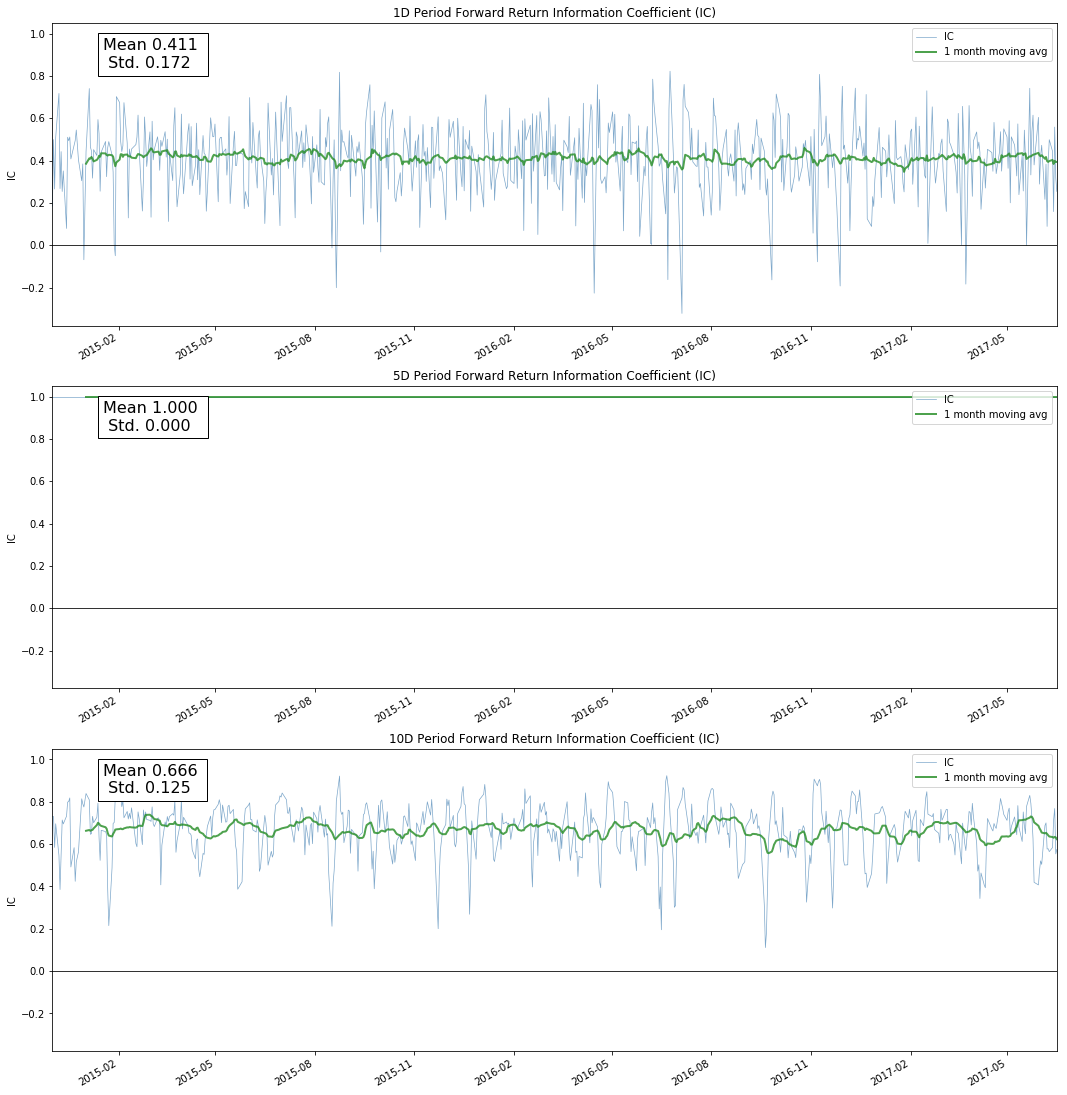

In [29]:
alphalens.plotting.plot_ic_ts(ic);

By looking at the IC each day we can understand how theoretically predicitive our factor is overtime. We like our mean IC to be high and the standard deviation, or volatility of it, to be low. We want to find consistently predictive factors.

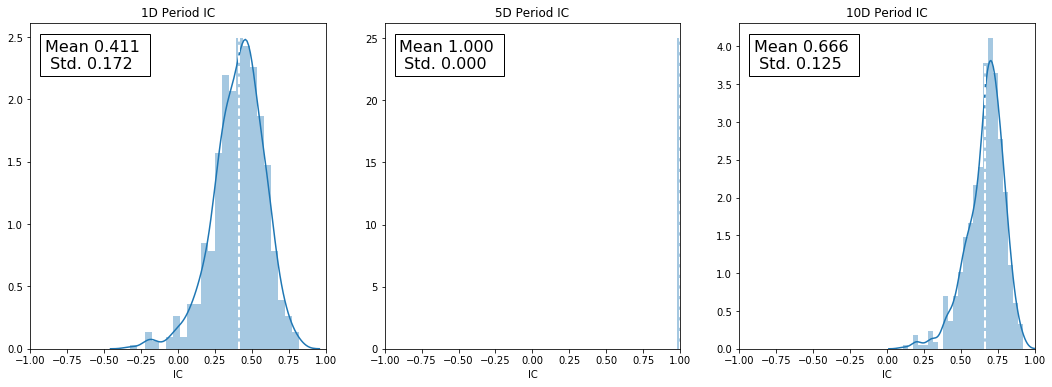

In [30]:
alphalens.plotting.plot_ic_hist(ic);

Looking at a histogram of the daily IC values can indicate how the factor behaves most of the time, where the likely IC values will fall, it also allows us to see if the factor has fat tails.

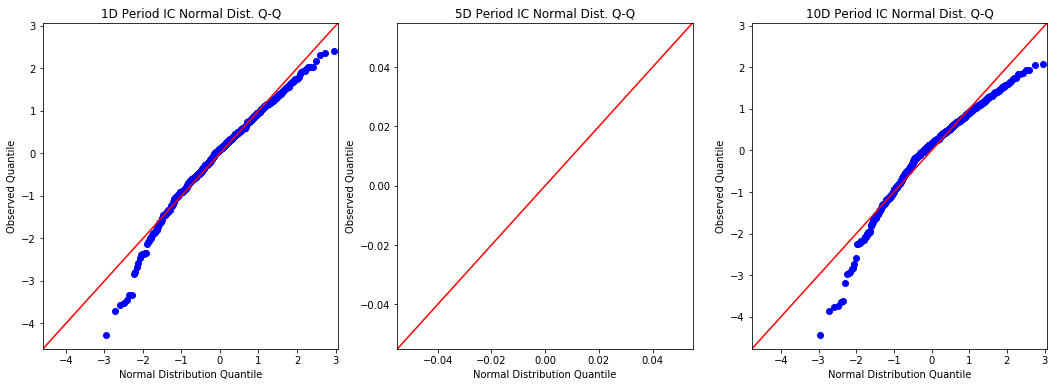

In [31]:
alphalens.plotting.plot_ic_qq(ic);

These Q-Q plots show the difference in shape between the distribution of IC values and a normal distribution. This is especially helpful in seeing how the most extreme values in the distribution affect the predicitive power.

In [32]:
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor_data, by_time='M')

In [33]:
mean_monthly_ic.head()

1D   5D       10D
date                               
2014-12-31  0.383151  1.0  0.654679
2015-01-31  0.415299  1.0  0.658443
2015-02-28  0.458855  1.0  0.730689
2015-03-31  0.428356  1.0  0.693320
2015-04-30  0.418943  1.0  0.629777

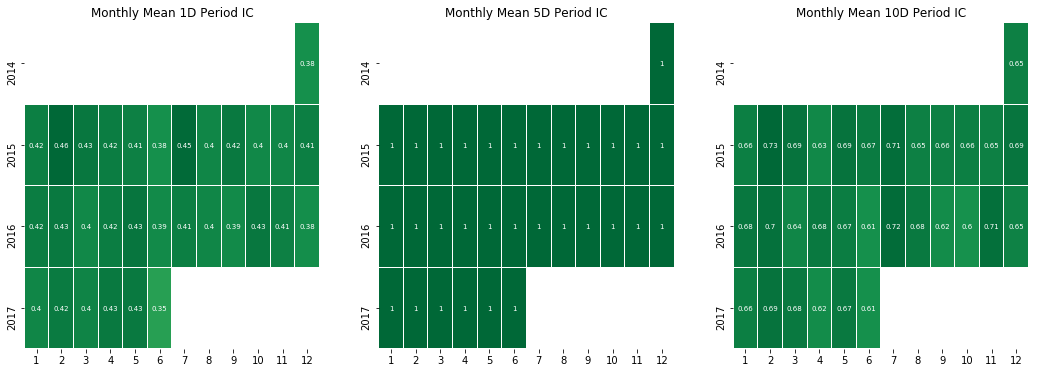

In [34]:
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic);

By displaying the IC data in heatmap format we can get an idea about the consistency of the factor, and how it behaves during different market regimes/seasons.

## Information Tear Sheet

We can view all information analysis calculations together.

Information Analysis


1D        5D      10D
IC Mean            0.411  1.000000    0.666
IC Std.            0.172  0.000000    0.125
Risk-Adjusted IC   2.391       inf    5.334
t-stat(IC)        60.487       inf  134.939
p-value(IC)        0.000  0.000000    0.000
IC Skew           -0.670  0.000000   -0.989
IC Kurtosis        1.147 -3.000000    1.585

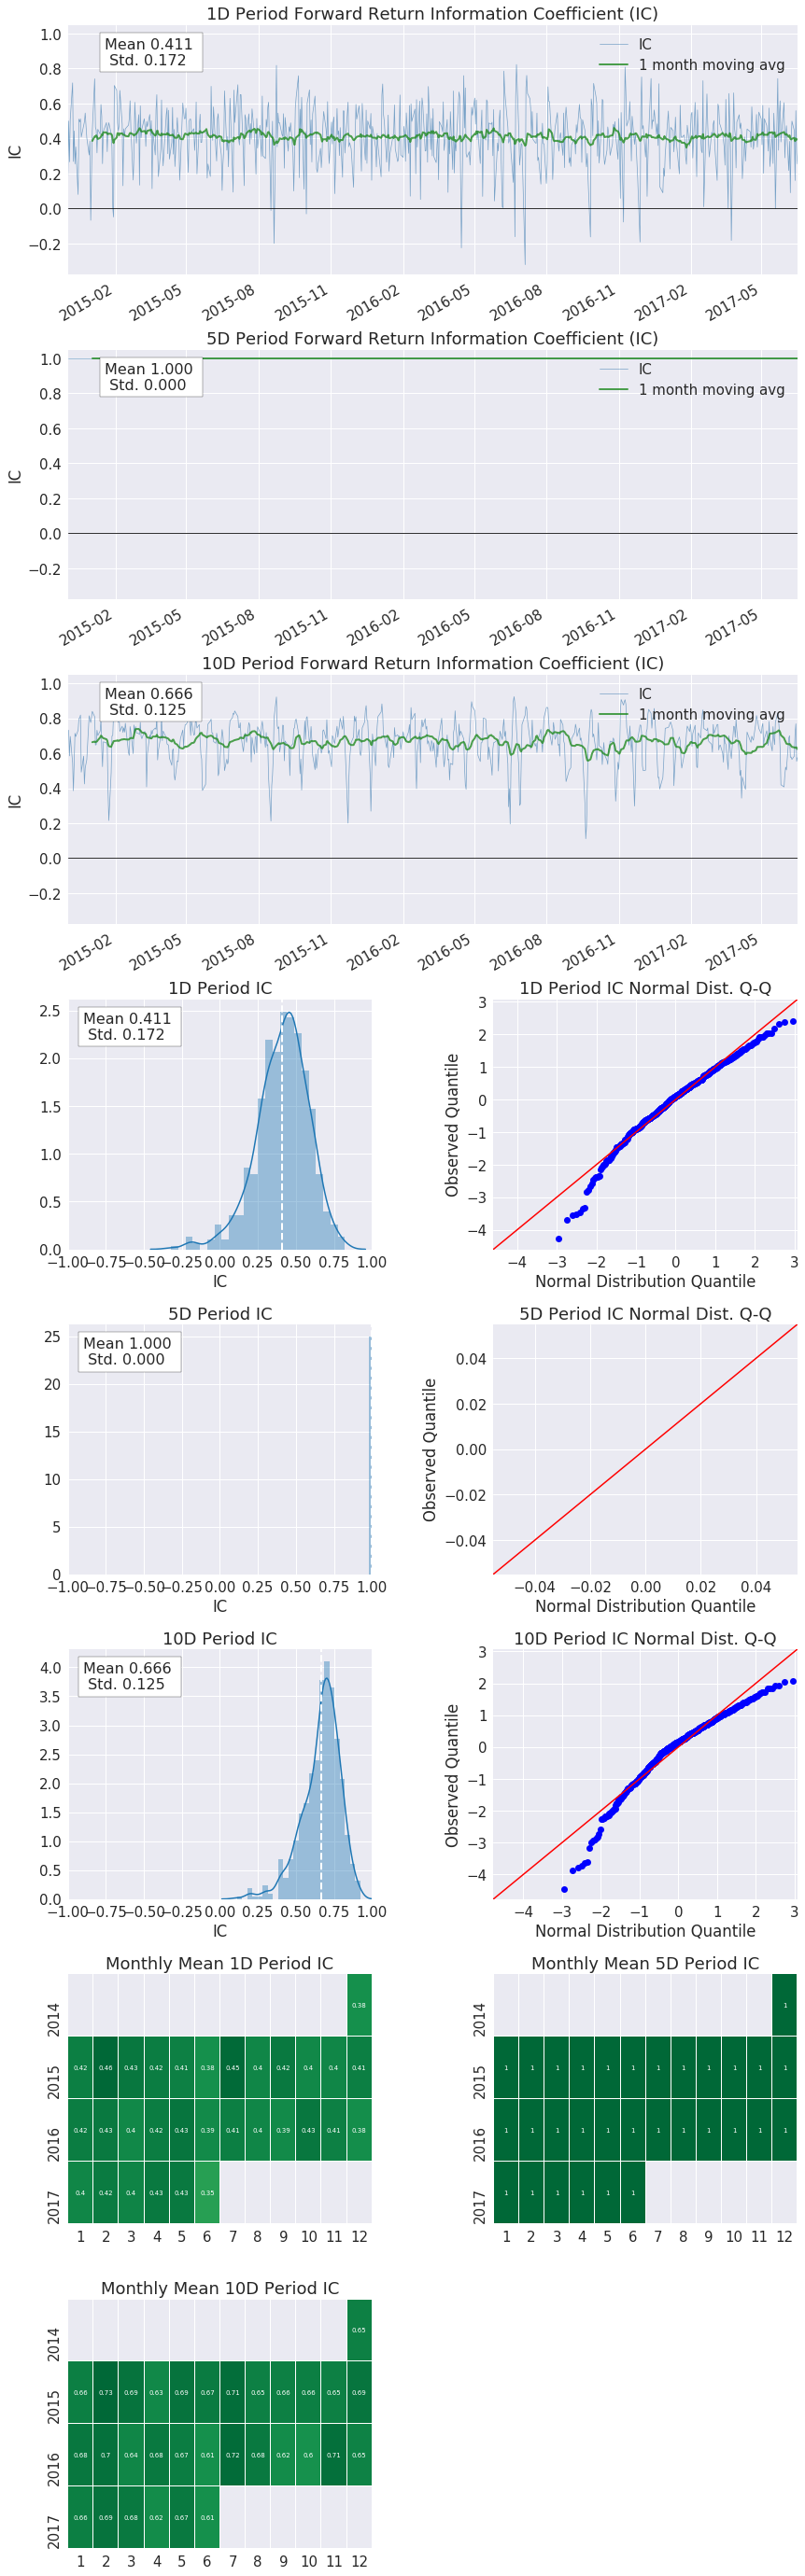

In [35]:
alphalens.tears.create_information_tear_sheet(factor_data)

# Turnover Analysis

Turnover Analysis gives us an idea about the nature of a factor's makeup and how it changes.

In [36]:
quantile_factor = factor_data['factor_quantile']
turnover_period = 1

In [37]:
quantile_turnover = pd.concat([alphalens.performance.quantile_turnover(quantile_factor, q, turnover_period)
                               for q in range(1, int(quantile_factor.max()) + 1)], axis=1)

In [38]:
quantile_turnover.head()

1         2         3         4         5
date                                                        
2014-12-02       NaN       NaN       NaN       NaN       NaN
2014-12-03  0.166667  0.388889  0.514286  0.555556  0.388889
2014-12-04  0.166667  0.555556  0.771429  0.722222  0.444444
2014-12-05  0.138889  0.361111  0.542857  0.527778  0.583333
2014-12-08  0.277778  0.500000  0.514286  0.361111  0.111111

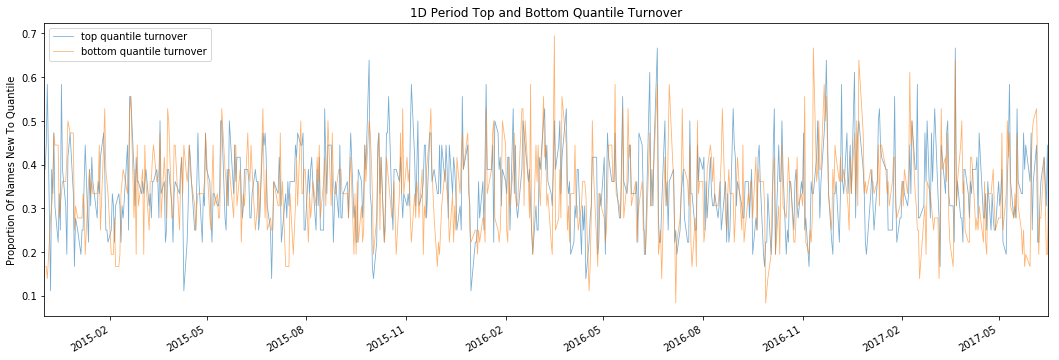

In [39]:
alphalens.plotting.plot_top_bottom_quantile_turnover(quantile_turnover, turnover_period)

Factor turnover is important as it indicates the incorporation of new information and the make up of the extremes of a signal. By looking at the new additions to the sets of top and bottom quantiles we can see how much of this factor is getting remade everyday.

In [40]:
factor_autocorrelation = alphalens.performance.factor_rank_autocorrelation(factor_data, turnover_period)

In [41]:
factor_autocorrelation.head()

date
2014-12-02         NaN
2014-12-03    0.869994
2014-12-04    0.752428
2014-12-05    0.820461
2014-12-08    0.858680
Name: 1D, dtype: float64

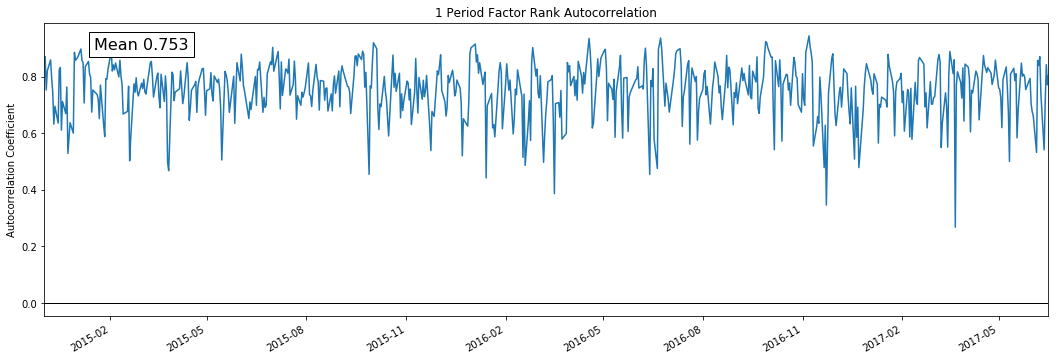

In [42]:
alphalens.plotting.plot_factor_rank_auto_correlation(factor_autocorrelation);

The autocorrelation of the factor indicates to us the persistence of the signal itself.

## Turnover Tear Sheet

We can view all turnover calculations together.

Turnover Analysis


10D     1D     5D
Quantile 1 Mean Turnover   0.773  0.339  0.761
Quantile 2 Mean Turnover   0.800  0.600  0.794
Quantile 3 Mean Turnover   0.779  0.640  0.779
Quantile 4 Mean Turnover   0.798  0.605  0.791
Quantile 5 Mean Turnover   0.795  0.349  0.787

1D     5D   10D
Mean Factor Rank Autocorrelation  0.753 -0.004 -0.02

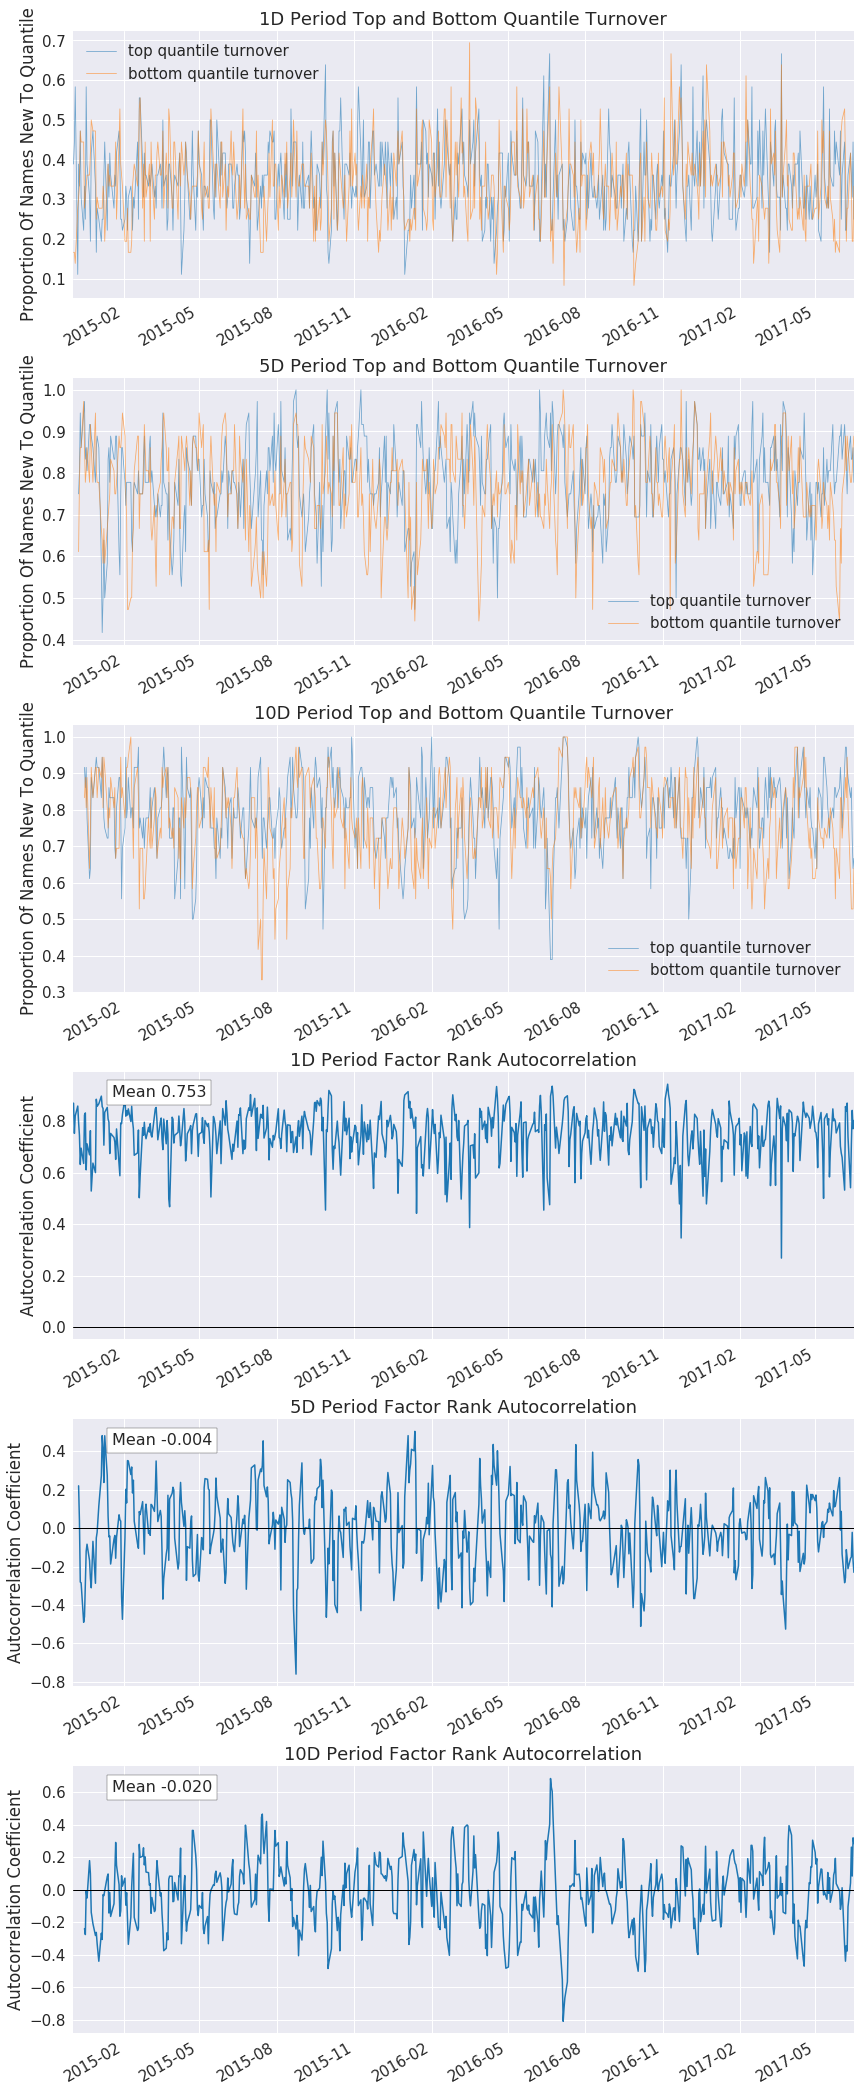

In [43]:
alphalens.tears.create_turnover_tear_sheet(factor_data)

# Event Style Returns Analysis

Looking at the average cumulative return in a window before and after a factor can indicate to us how long the predicative power of a factor lasts. This tear sheet takes a while to run.

**NOTE:** This tear sheet takes in an extra argument `pricing`.

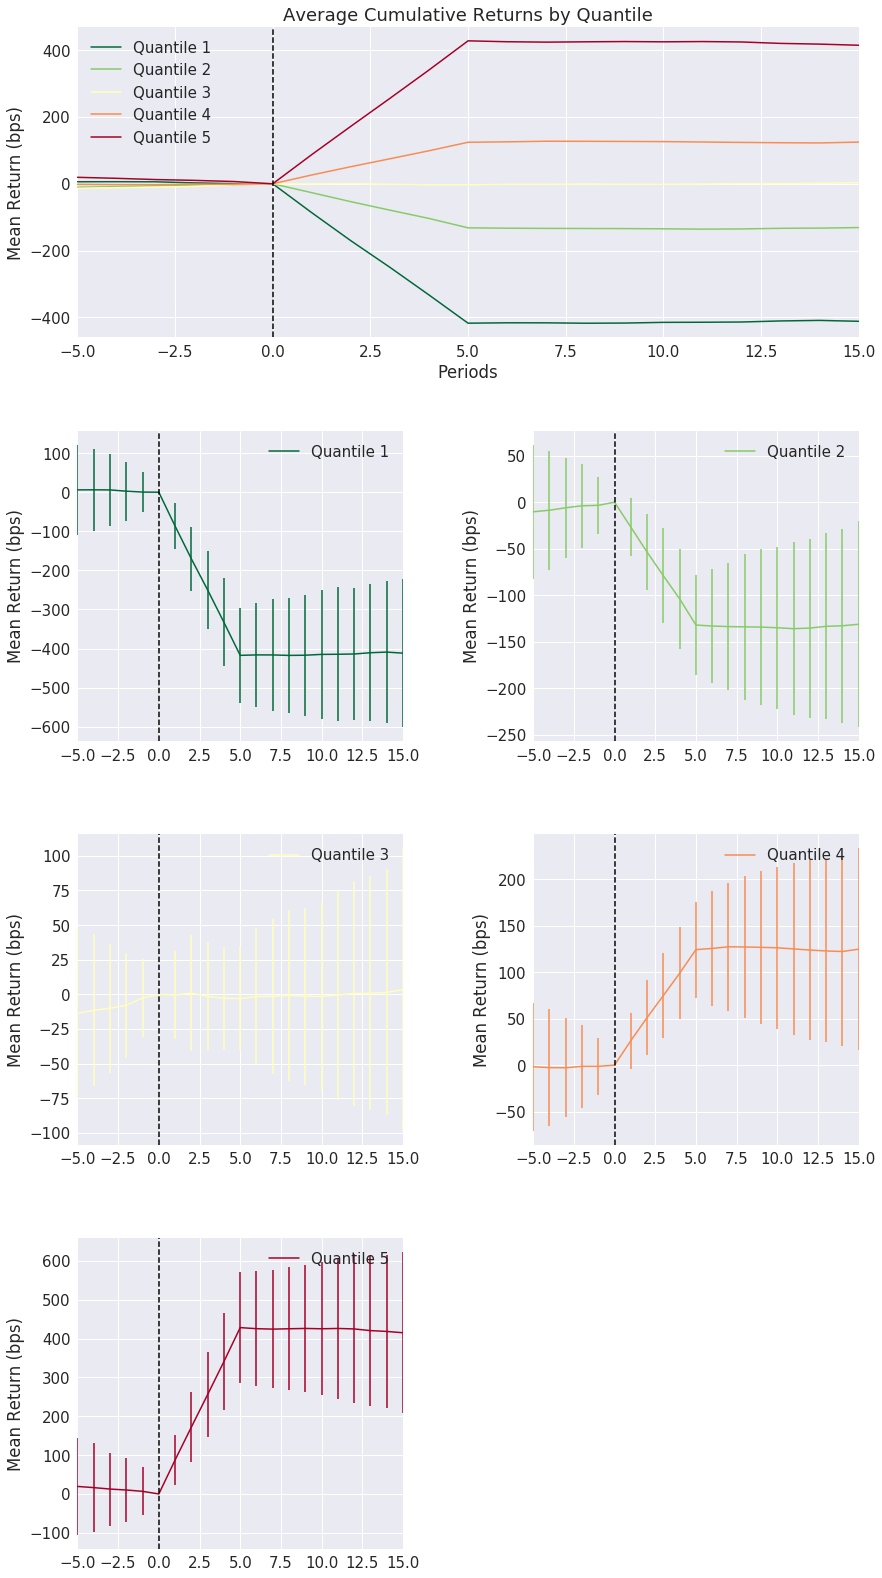

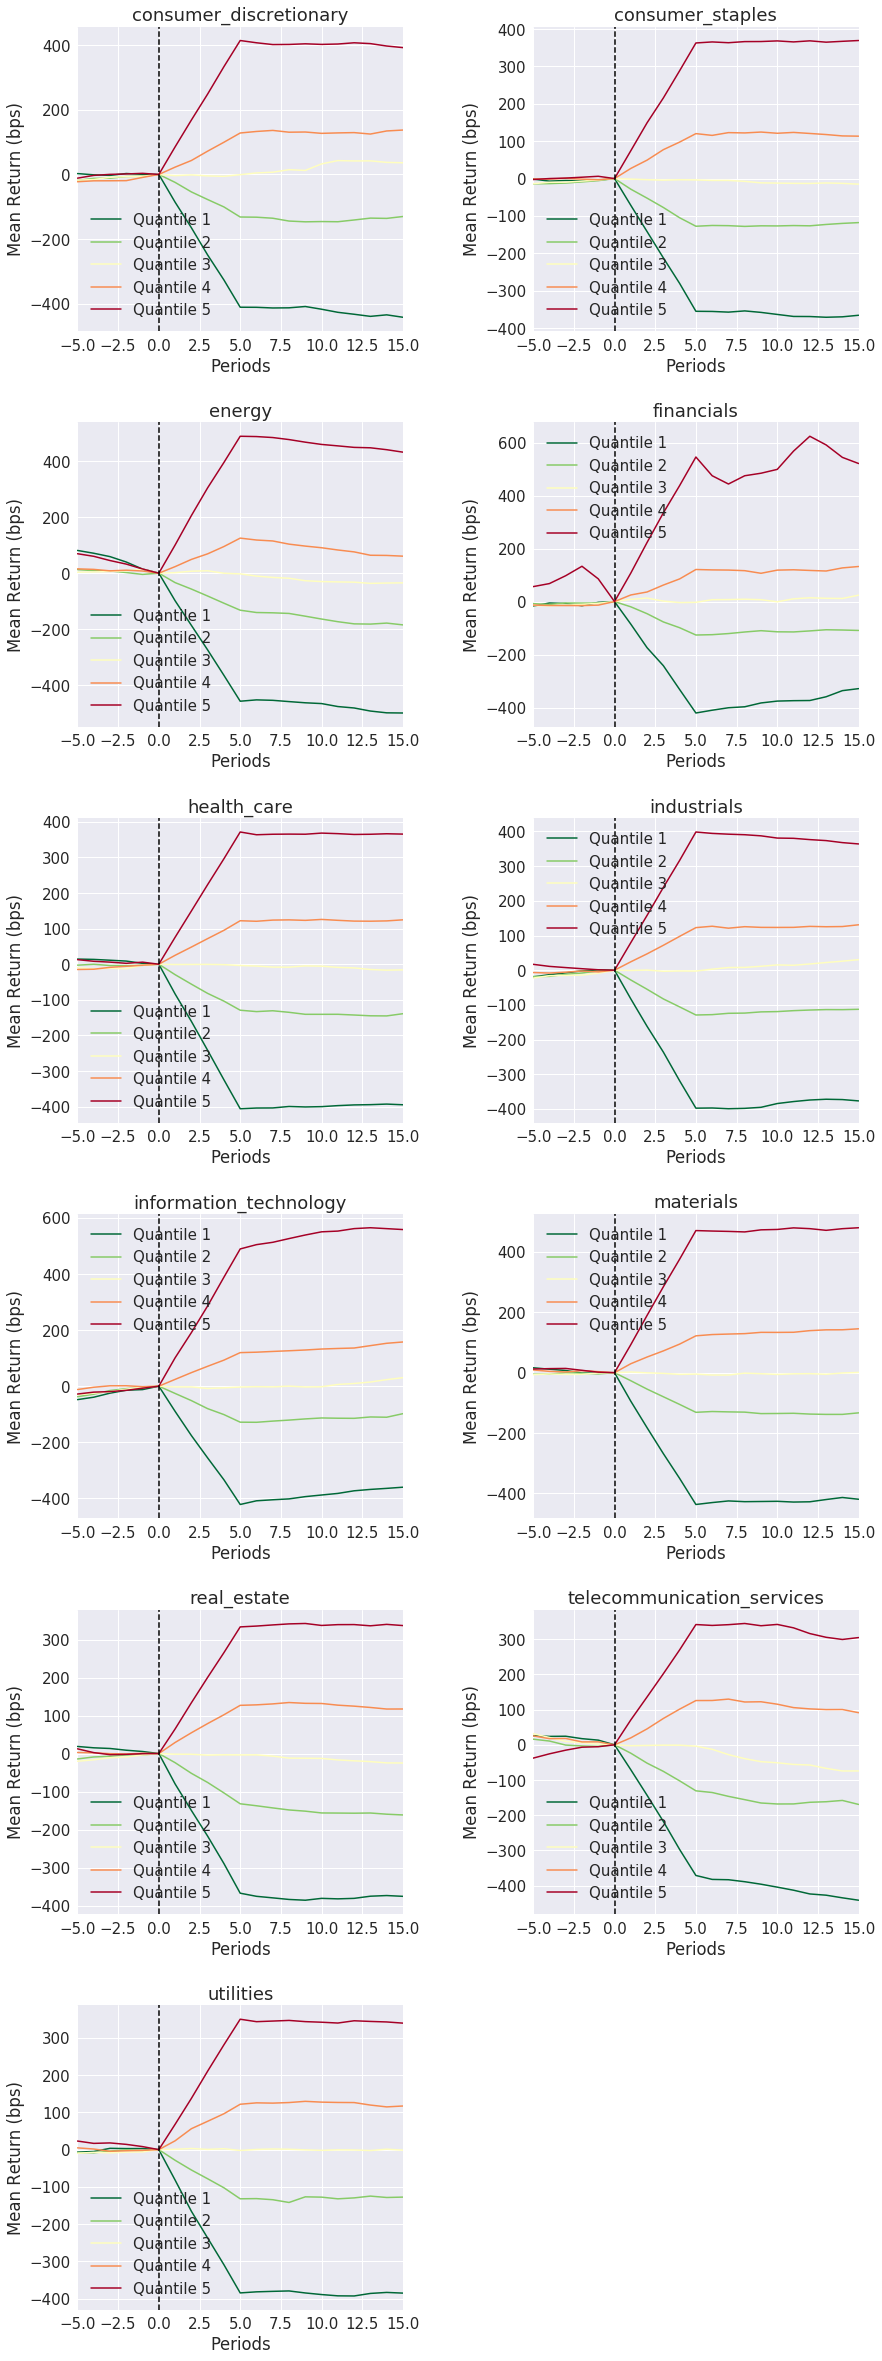

In [44]:
alphalens.tears.create_event_returns_tear_sheet(factor_data, pricing, by_group=True)

# Groupwise

Many of the plots in Alphalens can be viewed on their own by grouping if grouping information is provided. The returns and information tear sheets can be viewed groupwise by passing in the `by_group=True` argument.

In [45]:
ic_by_sector = alphalens.performance.mean_information_coefficient(factor_data, by_group=True)

In [46]:
ic_by_sector.head()

1D   5D       10D
group                                          
consumer_discretionary  0.377867  1.0  0.629799
consumer_staples        0.383505  1.0  0.642035
energy                  0.394624  1.0  0.636359
financials              0.400999  1.0  0.642888
health_care             0.393401  1.0  0.638911

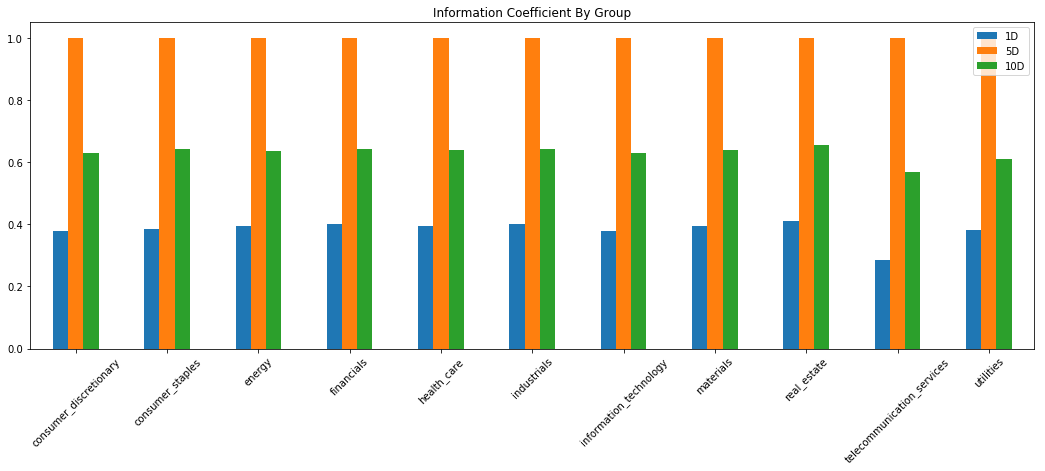

In [47]:
alphalens.plotting.plot_ic_by_group(ic_by_sector);

In [48]:
mean_return_quantile_sector, mean_return_quantile_sector_err = alphalens.performance.mean_return_by_quantile(factor_data, by_group=True)

In [49]:
mean_return_quantile_sector.head()

1D        5D       10D
factor_quantile group                                               
1               consumer_discretionary -0.008828 -0.042414 -0.042377
                consumer_staples       -0.007772 -0.037179 -0.038995
                energy                 -0.010000 -0.047878 -0.048914
                financials             -0.007394 -0.040775 -0.037057
                health_care            -0.008724 -0.042370 -0.041731

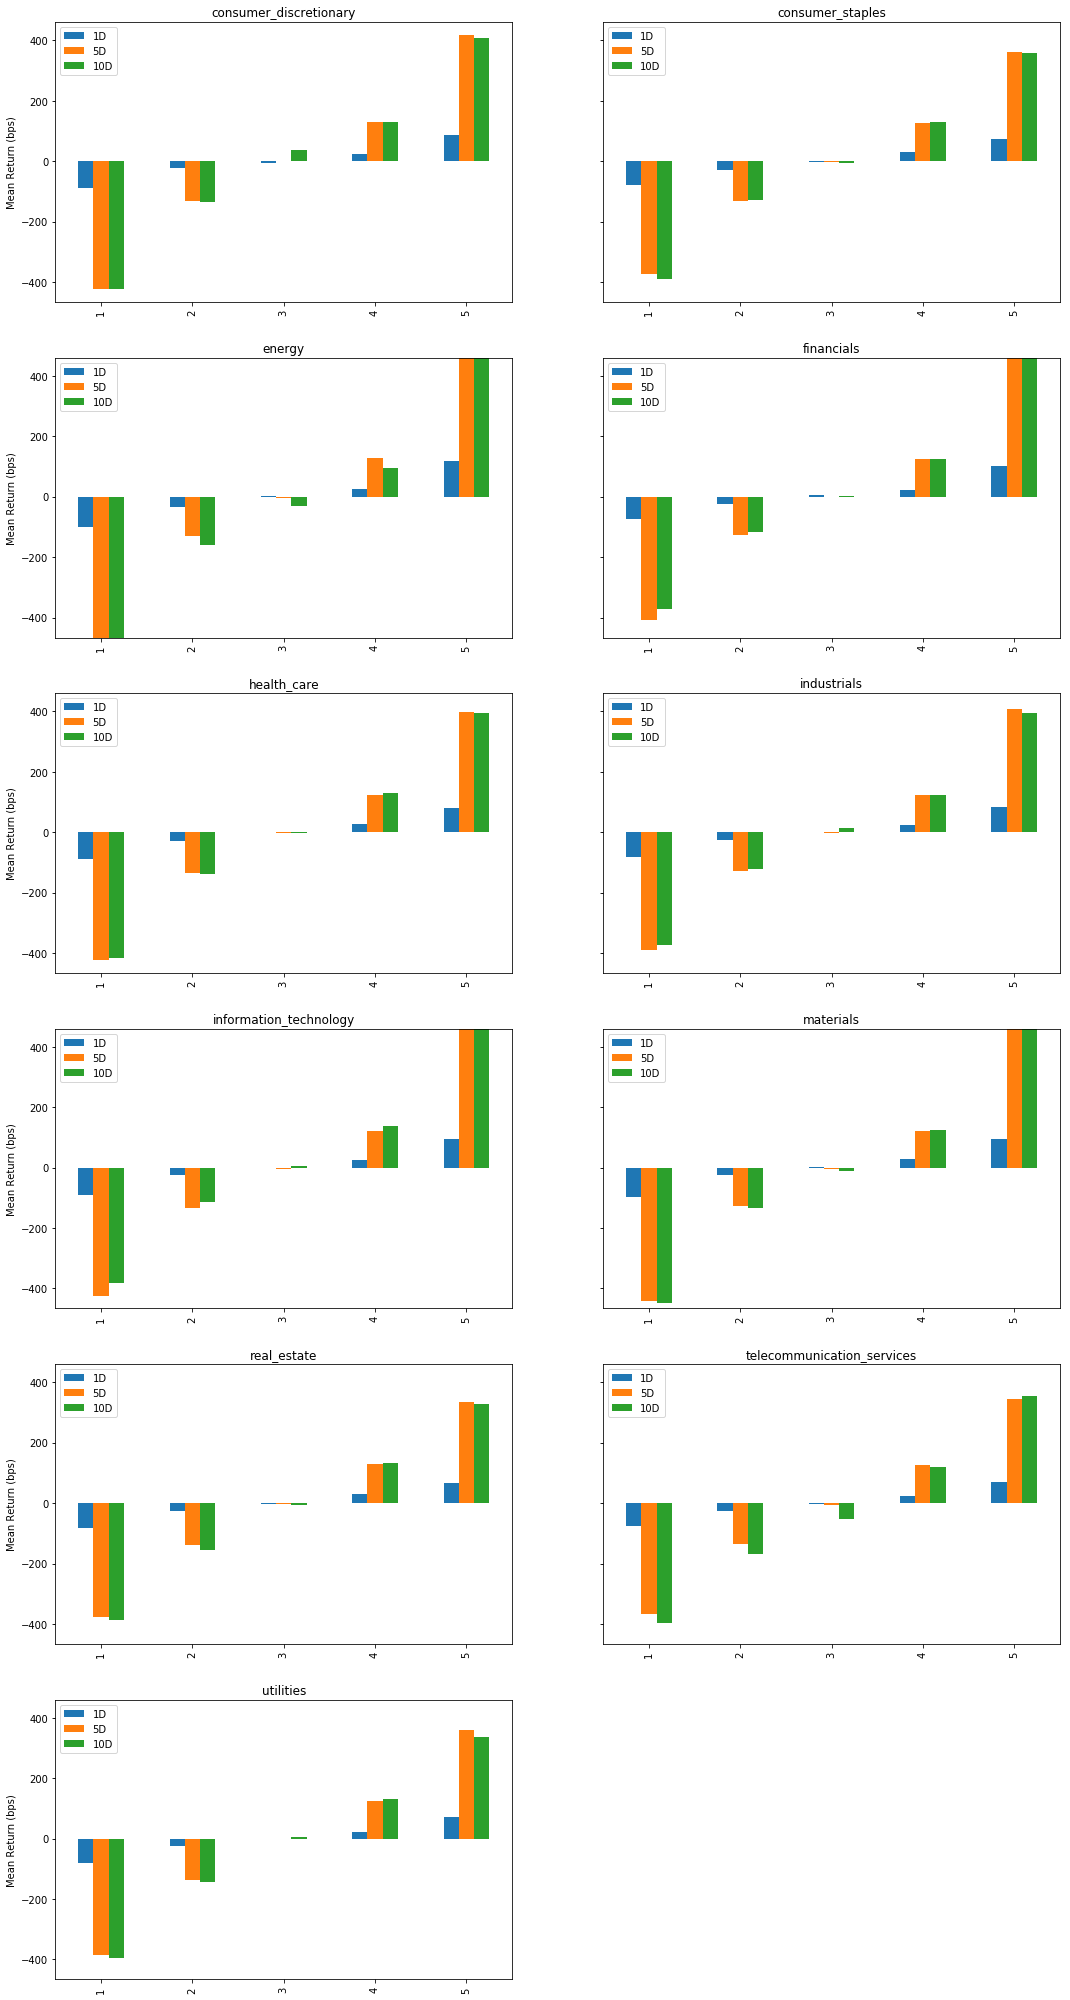

In [50]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_quantile_sector, by_group=True);

# Summary Tear Sheet

There are a lot of plots above. If you want a quick snapshot of how the alpha factor performs consider the summary tear sheet.

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.984736  0.033775 -0.039799  0.035396  23040  20.213186
2               -0.128468  0.046967 -0.011249  0.018324  22468  19.711366
3               -0.110053  0.069289  0.001650  0.017040  22970  20.151774
4               -0.087912  0.104223  0.014379  0.017957  22467  19.710488
5               -0.062230  5.000000  0.044757  0.059035  23040  20.213186

Returns Analysis


1D       5D     10D
Ann. alpha                                      20.690   14.905   2.720
beta                                             0.223    0.297   0.376
Mean Period Wise Return Top Quantile (bps)      87.462   84.181  41.715
Mean Period Wise Return Bottom Quantile (bps)  -86.701  -84.931 -42.301
Mean Period Wise Spread (bps)                  174.163  169.095  84.030

Information Analysis


1D        5D      10D
IC Mean            0.411  1.000000    0.666
IC Std.            0.172  0.000000    0.125
Risk-Adjusted IC   2.391       inf    5.334
t-stat(IC)        60.487       inf  134.939
p-value(IC)        0.000  0.000000    0.000
IC Skew           -0.670  0.000000   -0.989
IC Kurtosis        1.147 -3.000000    1.585

Turnover Analysis


10D     1D     5D
Quantile 1 Mean Turnover   0.773  0.339  0.761
Quantile 2 Mean Turnover   0.800  0.600  0.794
Quantile 3 Mean Turnover   0.779  0.640  0.779
Quantile 4 Mean Turnover   0.798  0.605  0.791
Quantile 5 Mean Turnover   0.795  0.349  0.787

1D     5D   10D
Mean Factor Rank Autocorrelation  0.753 -0.004 -0.02

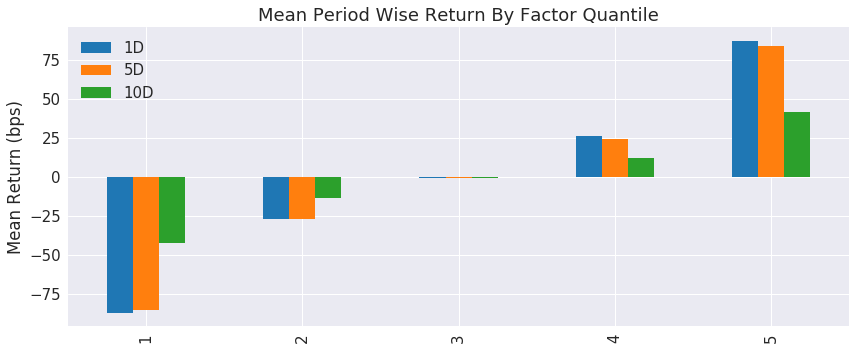

In [51]:
alphalens.tears.create_summary_tear_sheet(factor_data)

# The Whole Thing

If you want to see all of the results create a full tear sheet. By passing in the factor data you can analyze all of the above statistics and plots at once.

Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.984736  0.033775 -0.039799  0.035396  23040  20.213186
2               -0.128468  0.046967 -0.011249  0.018324  22468  19.711366
3               -0.110053  0.069289  0.001650  0.017040  22970  20.151774
4               -0.087912  0.104223  0.014379  0.017957  22467  19.710488
5               -0.062230  5.000000  0.044757  0.059035  23040  20.213186

Returns Analysis


1D       5D     10D
Ann. alpha                                      20.690   14.905   2.720
beta                                             0.223    0.297   0.376
Mean Period Wise Return Top Quantile (bps)      87.462   84.181  41.715
Mean Period Wise Return Bottom Quantile (bps)  -86.701  -84.931 -42.301
Mean Period Wise Spread (bps)                  174.163  169.095  84.030

Information Analysis


1D        5D      10D
IC Mean            0.411  1.000000    0.666
IC Std.            0.172  0.000000    0.125
Risk-Adjusted IC   2.391       inf    5.334
t-stat(IC)        60.487       inf  134.939
p-value(IC)        0.000  0.000000    0.000
IC Skew           -0.670  0.000000   -0.989
IC Kurtosis        1.147 -3.000000    1.585

Turnover Analysis


10D     1D     5D
Quantile 1 Mean Turnover   0.773  0.339  0.761
Quantile 2 Mean Turnover   0.800  0.600  0.794
Quantile 3 Mean Turnover   0.779  0.640  0.779
Quantile 4 Mean Turnover   0.798  0.605  0.791
Quantile 5 Mean Turnover   0.795  0.349  0.787

1D     5D   10D
Mean Factor Rank Autocorrelation  0.753 -0.004 -0.02

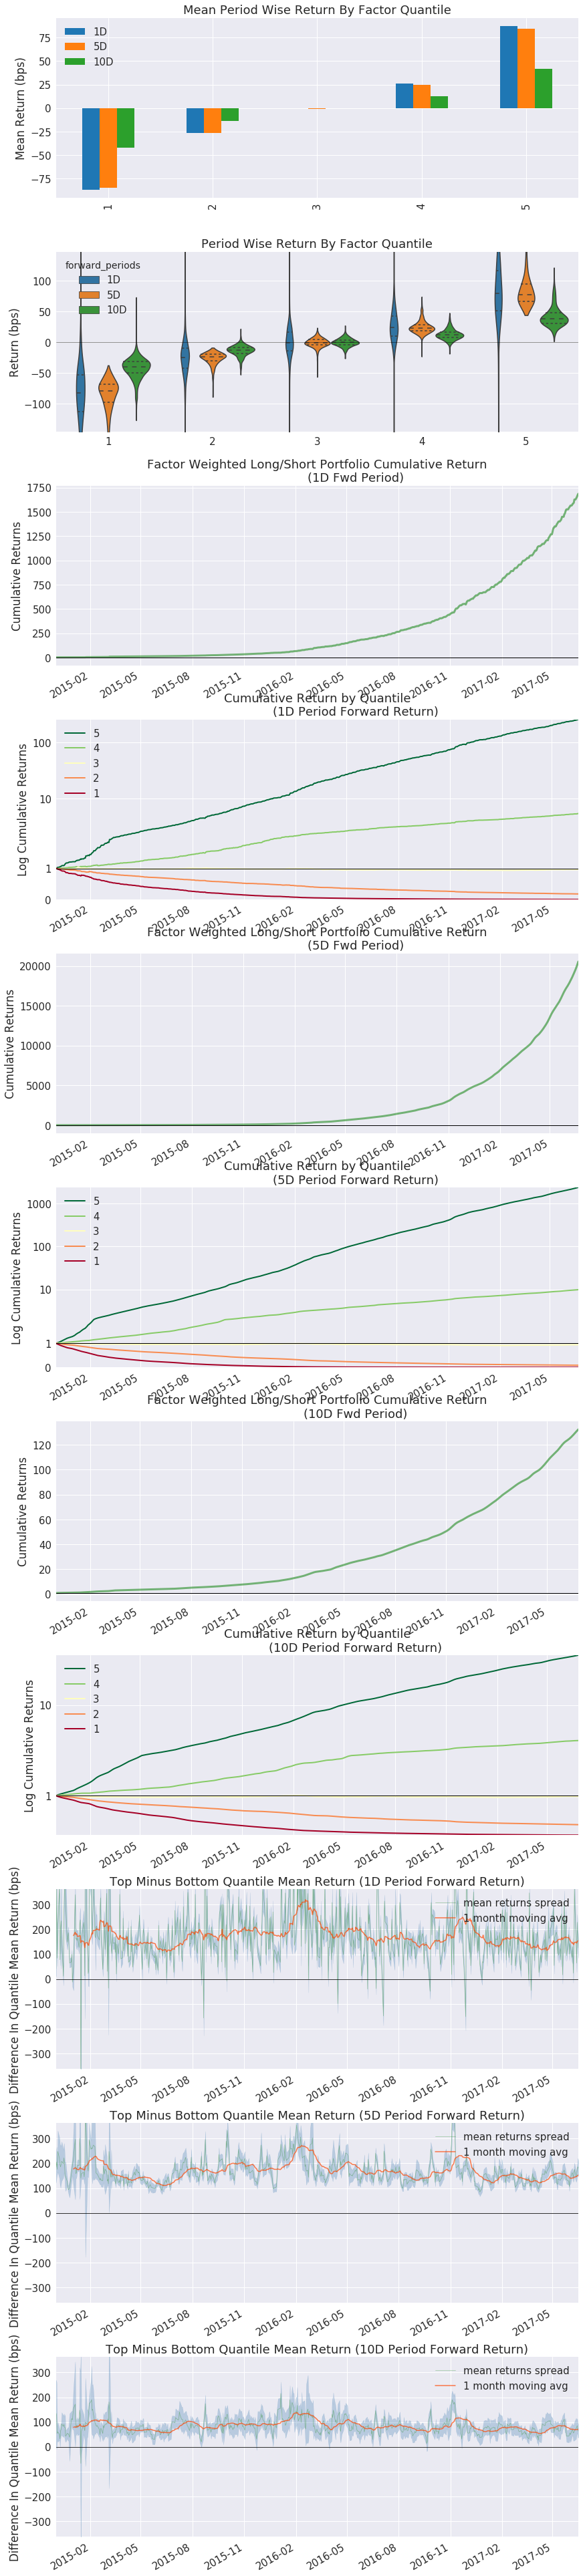

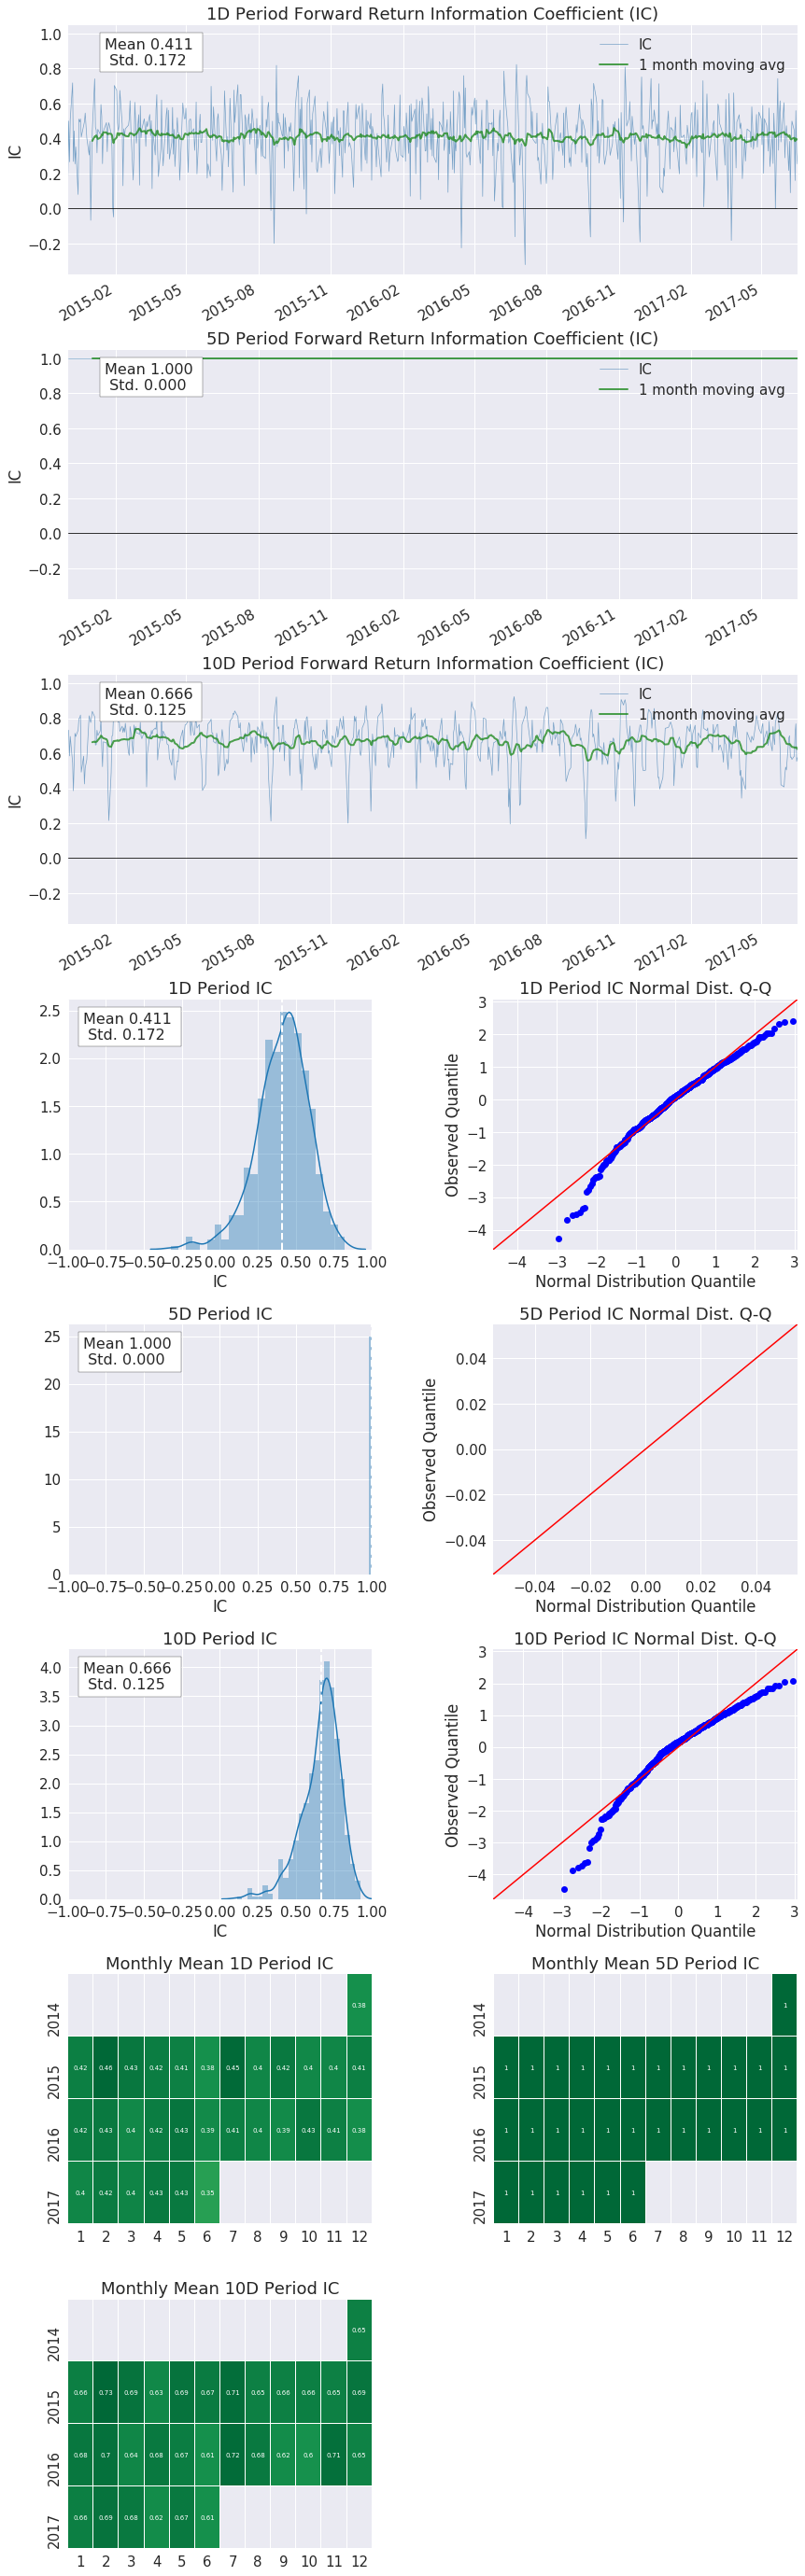

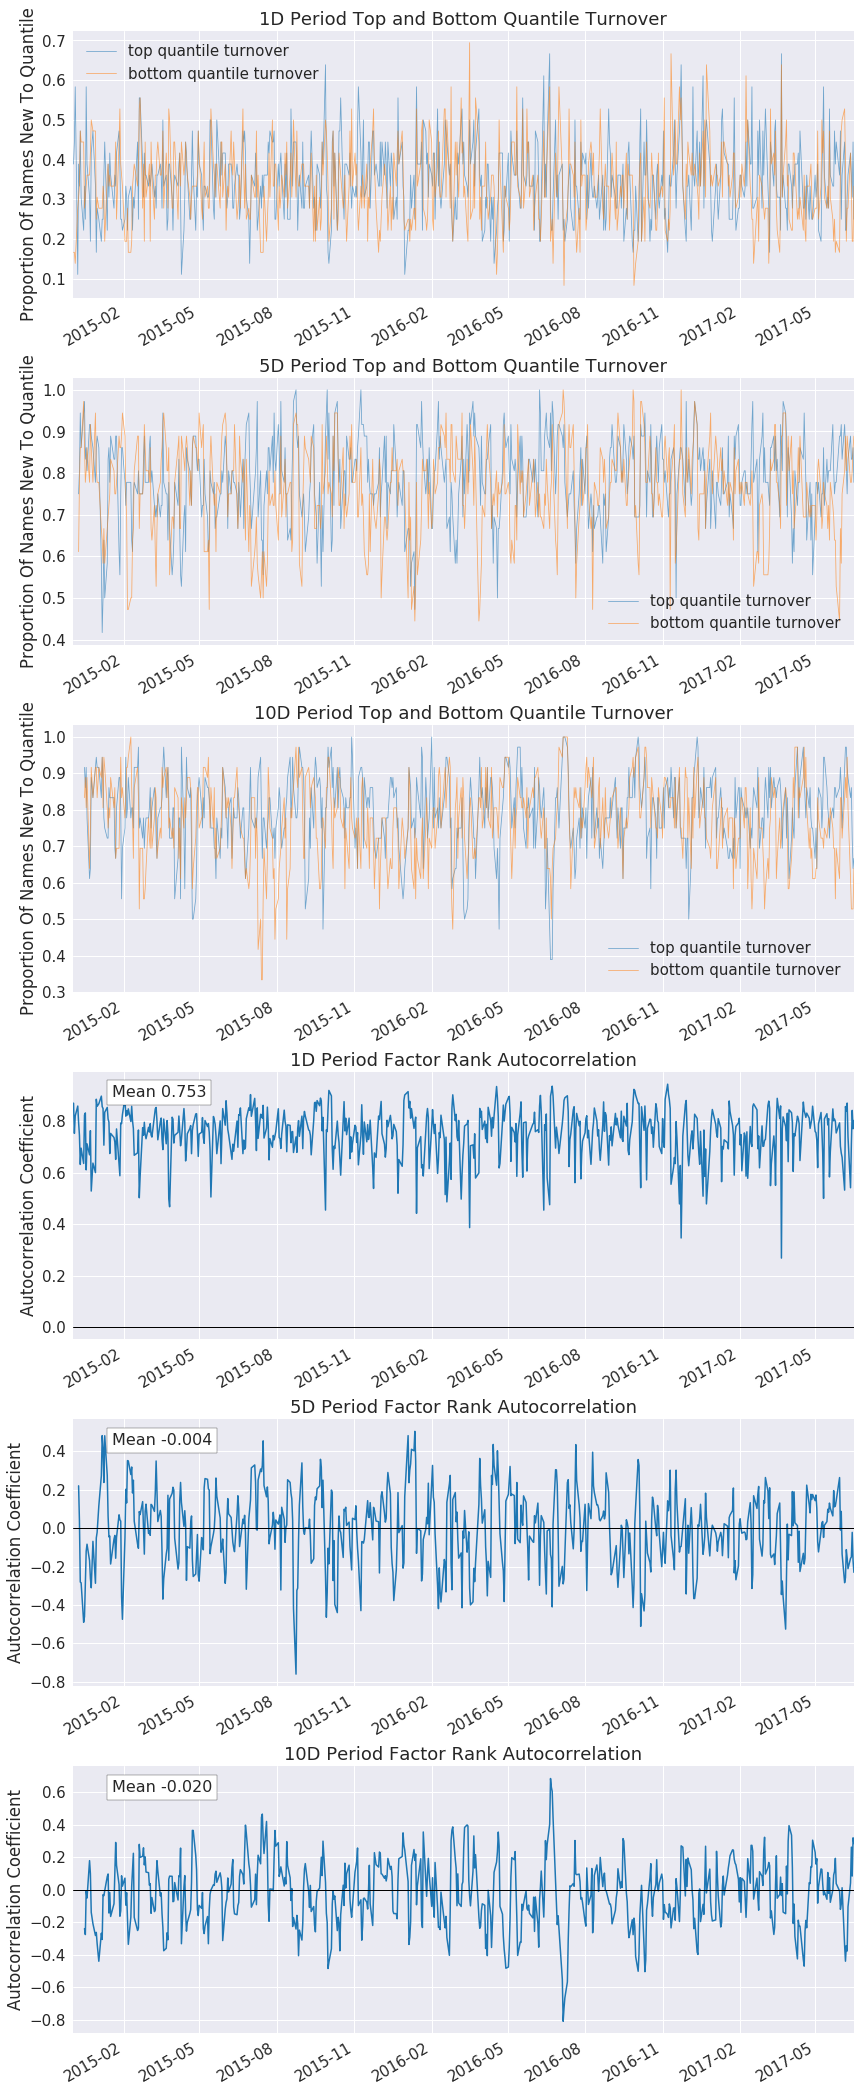

In [52]:
alphalens.tears.create_full_tear_sheet(factor_data)